# Generating forecasts and plotting microbiome trajectories 

In [1]:
import numpy as np
import pandas as pd
import qbiome.forecaster
import qbiome.qnet_orchestrator
import qbiome.quantizer
from quasinet import qnet

Load existing quantizer

In [2]:
quantizer = qbiome.quantizer.Quantizer(num_levels=6)
quantizer.load_quantizer_states("quantizer.pkl")

Train qnet from quantized data

In [3]:
features = pd.read_csv("features.csv", squeeze=True)
quantized_data = np.loadtxt("abund_data_quant.txt", dtype="<U1", delimiter=" ")

orchestrator = qbiome.qnet_orchestrator.QnetOrchestrator(quantizer)
orchestrator.train_qnet(
    features,
    quantized_data,
    alpha=0.3,
    min_samples_split=2,
)
forecaster = qbiome.forecaster.Forecaster(orchestrator)

Forecast starting from week 28

In [4]:
data = quantized_data[:10, :]  # to save time, forecast for the first 10 patients only

fc = forecaster.forecast_data(
    data,
    start_week=28,
    subject_id=list(range(len(data))),
)

## Plot microbiome trajectory (forecasted)

Note that a single trajectory consists of weekly abundance levels for all 91 microbial classes present

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Here, we look at the forecasted trajectory for the first patient

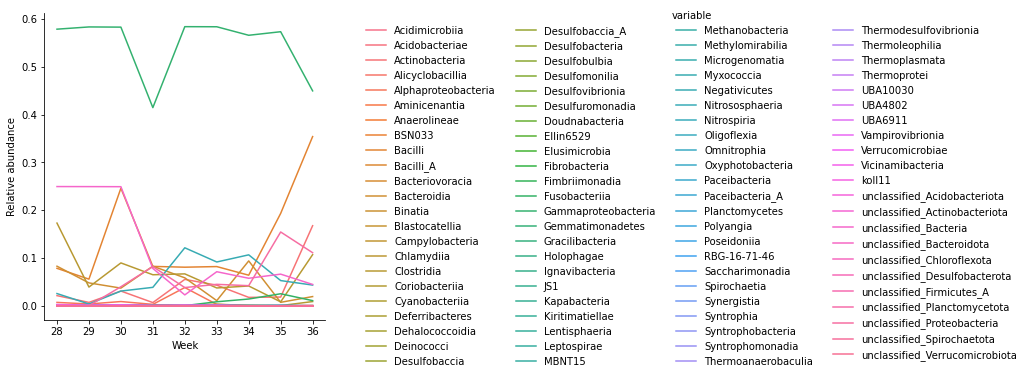

In [6]:
subject = 0

g = sns.relplot(
    data=fc.query("subject_id==@subject"), x="week", y="value", hue="variable", kind="line"
)
sns.move_legend(g, "upper left", bbox_to_anchor=(0.7, 1), ncol=4)
g.set_axis_labels("Week", "Relative abundance")